# XGBoost optimization

In this script, we:
- evaluate baselines,
- conduct a grid search for XGBoost to find optimal hyper-parameters,
- evaluate the model,
- evaluate features importance

To run this script, the following data files are needed:
- dt_final.xlsx (+)

Saved models:
- xgboost_tuned_weighted.model (+)

(attached: +, not attached: -)

In [3]:
# misc
import os
import re
import time
import ast
import warnings
import math
import copy
import matplotlib.pyplot as plt
from xgboost import plot_importance
import seaborn as sns

# data
import pandas as pd
import numpy as np
import csv

# ML
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn import metrics
import scikitplot as skplt
import xgboost 

In [4]:

data = pd.read_excel('data/dt_final.xlsx',engine='openpyxl')

## 1 Data preparation

In [5]:
# only features and label
dt = data[[
 'label4', 
 'glove_vec300_norm', 
 'tfidf_art', 
 'negative_conc',
 'positive_conc',
 'weak_subj',
 'strong_subj',
 'hyperbolic_terms',
 'attitude_markers',
 'kill_verbs',
 'bias_lexicon',
 'assertive_verbs',
 'factive_verbs',
 'report_verbs',
 'implicative_verbs',
 'hedges',
 'boosters',
 'affect ',
 'posemo ',
 'negemo ',
 'anx ',
 'anger ',
 'sad ',
 'social ',
 'family ',
 'friend ',
 'female ',
 'male ',
 'cogproc ',
 'insight ',
 'cause ',
 'discrep ',
 'tentat ',
 'certain ',
 'differ ',
 'percept ',
 'see ',
 'hear ',
 'feel ',
 'bio ',
 'body ',
 'health ',
 'sexual ',
 'ingest ',
 'drives ',
 'affiliation ',
 'achieve ',
 'power ',
 'reward ',
 'risk ',
 'focuspast ',
 'focuspresent ',
 'focusfuture ',
 'relativ ',
 'motion ',
 'space ',
 'time ',
 'work ',
 'leisure ',
 'home ',
 'money ',
 'relig ',
 'death ',
 'informal ',
 'swear ',
 'netspeak ',
 'assent ',
 'nonflu ',
 'filler ',
 'pos_ADJ',
 'pos_ADP',
 'pos_ADV',
 'pos_AUX',
 'pos_DET',
 'pos_INTJ',
 'pos_NOUN',
 'pos_PRON',
 'pos_PROPN',
 'pos_SCONJ',
 'pos_VERB',
 'pos_X',
 'dep_ROOT',
 'dep_acl',
 'dep_acomp',
 'dep_advcl',
 'dep_advmod',
 'dep_agent',
 'dep_amod',
 'dep_appos',
 'dep_attr',
 'dep_aux',
 'dep_auxpass',
 'dep_case',
 'dep_cc',
 'dep_ccomp',
 'dep_compound',
 'dep_conj',
 'dep_csubj',
 'dep_dative',
 'dep_dep',
 'dep_det',
 'dep_dobj',
 'dep_expl',
 'dep_intj',
 'dep_mark',
 'dep_meta',
 'dep_neg',
 'dep_nmod',
 'dep_npadvmod',
 'dep_nsubj',
 'dep_nsubjpass',
 'dep_nummod',
 'dep_oprd',
 'dep_parataxis',
 'dep_pcomp',
 'dep_pobj',
 'dep_poss',
 'dep_preconj',
 'dep_predet',
 'dep_prep',
 'dep_prt',
 'dep_punct',
 'dep_quantmod',
 'dep_relcl',
 'dep_xcomp',
 'ne_CARDINAL',
 'ne_DATE',
 'ne_EVENT',
 'ne_FAC',
 'ne_GPE',
 'ne_LANGUAGE',
 'ne_LAW',
 'ne_LOC',
 'ne_MONEY',
 'ne_NORP',
 'ne_ORDINAL',
 'ne_ORG',
 'ne_PERCENT',
 'ne_PERSON',
 'ne_PRODUCT',
 'ne_QUANTITY',
 'ne_TIME',
 'ne_WORK_OF_ART',
 'negative_conc_context',
 'positive_conc_context',
 'weak_subj_context',
 'strong_subj_context',
 'hyperbolic_terms_context',
 'attitude_markers_context',
 'kill_verbs_context',
 'bias_lexicon_context',
 'assertive_verbs_context',
 'factive_verbs_context',
 'report_verbs_context',
 'implicative_verbs_context',
 'hedges_context',
 'boosters_context',
 'affect _context',
 'posemo _context',
 'negemo _context',
 'anx _context',
 'anger _context',
 'sad _context',
 'social _context',
 'family _context',
 'friend _context',
 'female _context',
 'male _context',
 'cogproc _context',
 'insight _context',
 'cause _context',
 'discrep _context',
 'tentat _context',
 'certain _context',
 'differ _context',
 'percept _context',
 'see _context',
 'hear _context',
 'feel _context',
 'bio _context',
 'body _context',
 'health _context',
 'sexual _context',
 'ingest _context',
 'drives _context',
 'affiliation _context',
 'achieve _context',
 'power _context',
 'reward _context',
 'risk _context',
 'focuspast _context',
 'focuspresent _context',
 'focusfuture _context',
 'relativ _context',
 'motion _context',
 'space _context',
 'time _context',
 'work _context',
 'leisure _context',
 'home _context',
 'money _context',
 'relig _context',
 'death _context',
 'informal _context',
 'swear _context',
 'netspeak _context',
 'assent _context',
 'nonflu _context',
 'filler _context',
 'pos_ADJ_context',
 'pos_ADP_context',
 'pos_ADV_context',
 'pos_AUX_context',
 'pos_DET_context',
 'pos_INTJ_context',
 'pos_NOUN_context',
 'pos_PRON_context',
 'pos_PROPN_context',
 'pos_SCONJ_context',
 'pos_VERB_context',
 'pos_X_context',
 'dep_ROOT_context',
 'dep_acl_context',
 'dep_acomp_context',
 'dep_advcl_context',
 'dep_advmod_context',
 'dep_agent_context',
 'dep_amod_context',
 'dep_appos_context',
 'dep_attr_context',
 'dep_aux_context',
 'dep_auxpass_context',
 'dep_case_context',
 'dep_cc_context',
 'dep_ccomp_context',
 'dep_compound_context',
 'dep_conj_context',
 'dep_csubj_context',
 'dep_dative_context',
 'dep_dep_context',
 'dep_det_context',
 'dep_dobj_context',
 'dep_expl_context',
 'dep_intj_context',
 'dep_mark_context',
 'dep_meta_context',
 'dep_neg_context',
 'dep_nmod_context',
 'dep_npadvmod_context',
 'dep_nsubj_context',
 'dep_nsubjpass_context',
 'dep_nummod_context',
 'dep_oprd_context',
 'dep_parataxis_context',
 'dep_pcomp_context',
 'dep_pobj_context',
 'dep_poss_context',
 'dep_preconj_context',
 'dep_predet_context',
 'dep_prep_context',
 'dep_prt_context',
 'dep_punct_context',
 'dep_quantmod_context',
 'dep_relcl_context',
 'dep_xcomp_context',
 'ne_CARDINAL_context',
 'ne_DATE_context',
 'ne_EVENT_context',
 'ne_FAC_context',
 'ne_GPE_context',
 'ne_LAW_context',
 'ne_LOC_context',
 'ne_MONEY_context',
 'ne_NORP_context',
 'ne_ORDINAL_context',
 'ne_ORG_context',
 'ne_PERCENT_context',
 'ne_PERSON_context',
 'ne_PRODUCT_context',
 'ne_QUANTITY_context',
 'ne_TIME_context',
 'ne_WORK_OF_ART_context',
 'ne_LANGUAGE_context']]

In [6]:
print('Number of missing values:')
mis = (dt.isnull().sum()).to_frame()
for i, row in mis.iterrows():
    if row[0] > 0:
        print(i, row[0])

# Delete the rows with missing article text:
dt = dt.dropna(subset=['tfidf_art'])

Number of missing values:
tfidf_art 654


In [7]:
x = dt.drop(['label4'], 1)
y4 = dt[['label4']]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11228\2443302479.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = dt.drop(['label4'], 1)


In [8]:
# train-test split
train_features, test_features, train_labels, test_labels = train_test_split(x, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [9]:
feature_names = list(x.columns)

In [10]:
# matrix for XGBoost
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [11]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print('Training Features for final model Shape:', train_features1.shape)
print('Training Labels for final model Shape:', train_labels1.shape)
print('Validation Features Shape:', val_features.shape)
print('Validation Labels Shape:', val_labels.shape)

Training Features Shape: (27801, 282)
Training Labels Shape: (27801, 1)
Testing Features Shape: (3089, 282)
Testing Labels Shape: (3089, 1)
Training Features for final model Shape: (25020, 282)
Training Labels for final model Shape: (25020, 1)
Validation Features Shape: (2781, 282)
Validation Labels Shape: (2781, 1)


## 2 Baselines

### B1: Random guesser

In [12]:
b1_pred = pd.Series(np.random.randint(2, size=len(test_features)))

In [13]:
print('Performance of b1, test:')
print('F1:', round(metrics.f1_score(test_labels,b1_pred),2))
print('Precision:', round(metrics.precision_score(test_labels,b1_pred),2))
print('Recall:', round(metrics.recall_score(test_labels,b1_pred),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b1_pred),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b1_pred),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(test_labels,b1_pred).transpose())

Performance of b1, test:
F1: 0.16
Precision: 0.1
Recall: 0.51
AUC: 0.5
Accuracy: 0.49
Confusion matrix:
 [[1346  150]
 [1438  155]]


### B2: Negative sentiment lexicon

In [14]:
b2_pred = test_features.negative_conc

In [15]:
print('Performance of b2, test:')
print('F1:', round(metrics.f1_score(test_labels,b2_pred),2))
print('Precision:', round(metrics.precision_score(test_labels,b2_pred),2))
print('Recall:', round(metrics.recall_score(test_labels,b2_pred),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b2_pred),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b2_pred),2))
print('Confusion matrix:\n', metrics.confusion_matrix(test_labels,b2_pred).transpose())

Performance of b2, test:
F1: 0.4
Precision: 0.34
Recall: 0.47
AUC: 0.69
Accuracy: 0.86
Confusion matrix:
 [[2511  162]
 [ 273  143]]


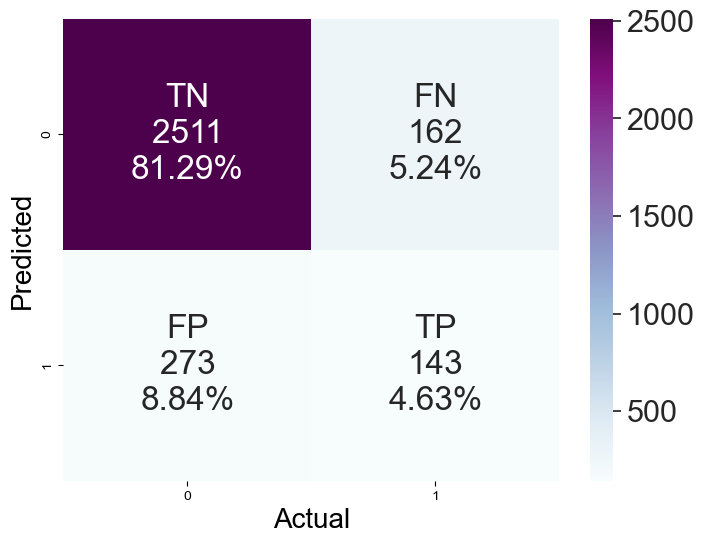

In [16]:
cf_matrix = metrics.confusion_matrix(test_labels,b2_pred)
TN = cf_matrix[0][0]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]
FP = cf_matrix[0][1]
fl = [TN, FN, FP, TP]
fig, ax = plt.subplots(figsize=(8,6))

sns.set(font_scale=2)
group_names = ['TN','FN','FP','TP']
group_counts = ["{0:0.0f}".format(value) for value in fl]
group_percentages = ["{0:.2%}".format(value) for value in
                     fl/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap="BuPu")
plt.ylabel('Predicted', fontsize=20)
plt.xlabel('Actual', fontsize=20)
ax.set_ylim([0,2])
ax.invert_yaxis()

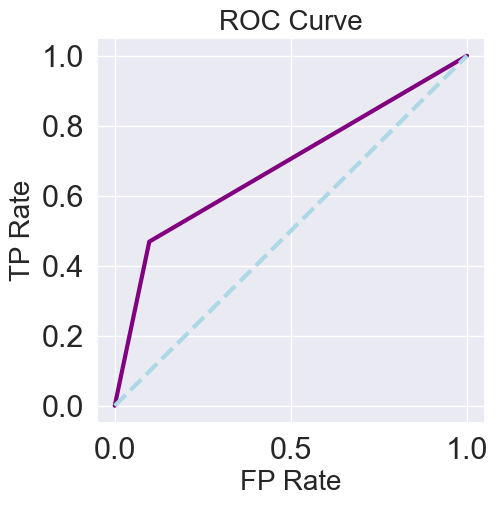

In [17]:
plt.rcParams['font.size'] = 16
plt.subplots(1, 1, figsize=(5,5))

rand_probs = [0 for _ in range(len(test_labels))]
rand_fpr, rand_tpr, thresholds = metrics.roc_curve(test_labels, rand_probs)

fpr, tpr, thresholds = metrics.roc_curve(test_labels, b2_pred,
                                         pos_label=1)
plt.plot(fpr, tpr, linewidth=3, color='purple')
plt.plot(rand_fpr, rand_tpr, linestyle='--', linewidth=3, color='lightblue')
plt.title("ROC Curve", fontsize=20)
plt.xlabel("FP Rate", fontsize=20)
plt.ylabel("TP Rate", fontsize=20)
plt.show()

### B3: Negative and positive sentiment lexicon

In [18]:
b3_pred = test_features.apply(lambda row: 1 if row.negative_conc==1 or row.positive_conc==1 else 0, axis=1)

In [19]:
print('Performance of b3, test:')
print('F1:', round(metrics.f1_score(test_labels,b3_pred),2))
print('Precision:', round(metrics.precision_score(test_labels,b3_pred),2))
print('Recall:', round(metrics.recall_score(test_labels,b3_pred),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b3_pred),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b3_pred),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(test_labels,b3_pred).transpose())

Performance of b3, test:
F1: 0.34
Precision: 0.23
Recall: 0.61
AUC: 0.69
Accuracy: 0.76
Confusion matrix:
 [[2162  118]
 [ 622  187]]


### B4: Semi-automated bias lexicon

In [20]:
b4_pred = test_features.bias_lexicon

In [21]:
print('Performance of b4, test:')
print('F1:', round(metrics.f1_score(test_labels,b4_pred),2))
print('Precision:', round(metrics.precision_score(test_labels,b4_pred),2))
print('Recall:', round(metrics.recall_score(test_labels,b4_pred),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b4_pred),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b4_pred),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(test_labels,b4_pred).transpose())

Performance of b4, test:
F1: 0.18
Precision: 0.57
Recall: 0.11
AUC: 0.55
Accuracy: 0.9
Confusion matrix:
 [[2759  272]
 [  25   33]]


## 3 XGBoost optimization

In [22]:
print('Biased words:',round(len(y4[y4['label4']==1])/len(y4)*100,0),'%')
print('Biased words:',round(len(y4[y4['label4']==0])/len(y4)*100,0),'%')

Biased words: 10.0 %
Biased words: 90.0 %


### 3.1 Hyper-parameters tuning

We don't train full gridsearch, instead, we train different mutually dependent hyper-parameters together:
- max_depth & min_child_weight
- subsample & colsample_bytree
- eta

In [23]:
scale_pos_weight = len(train_labels[train_labels['label4']==0])/len(train_labels[train_labels['label4']==1])
scale_pos_weight

9.498867069486405

In [24]:
params = {
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':"binary:logistic",
    'disable_default_eval_metric': 1,
    'seed': 42,
    'tree_method': 'hist',
    'scale_pos_weight': scale_pos_weight
}

num_boost_round = 999

In [25]:
def f1_eval(predt: np.ndarray, dtrain: xgboost.DMatrix):
    y = dtrain.get_label()
    predt_binary = np.where(predt > 0.5, 1, 0)
    return "F1_score", metrics.f1_score(y_true=y, y_pred=predt_binary)

In [26]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,13,1)
    for min_child_weight in range(4,41,2)
]

In [27]:
start_time = time.time()
max_f1 = float(0)
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    cv_results = xgboost.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        feval=f1_eval,
        early_stopping_rounds = 10,
        maximize=True)
    
    mean_f1 = cv_results['test-F1_score-mean'].max()
    boost_rounds = cv_results['test-F1_score-mean'].argmax()
    print("\tF1 {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, F1: {}".format(best_params[0], best_params[1], max_f1))
end_time = time.time()
print('time:', end_time - start_time)

CV with max_depth=6, min_child_weight=4


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44955 for 40 rounds
CV with max_depth=6, min_child_weight=6


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45124380000000003 for 14 rounds
CV with max_depth=6, min_child_weight=8


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4471208 for 8 rounds
CV with max_depth=6, min_child_weight=10


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4509322 for 23 rounds
CV with max_depth=6, min_child_weight=12


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45166779999999995 for 21 rounds
CV with max_depth=6, min_child_weight=14


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44958219999999993 for 33 rounds
CV with max_depth=6, min_child_weight=16


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.452503 for 36 rounds
CV with max_depth=6, min_child_weight=18


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4502452 for 14 rounds
CV with max_depth=6, min_child_weight=20


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4557612 for 26 rounds
CV with max_depth=6, min_child_weight=22


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4489942 for 33 rounds
CV with max_depth=6, min_child_weight=24


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44809859999999996 for 17 rounds
CV with max_depth=6, min_child_weight=26


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4541218000000001 for 36 rounds
CV with max_depth=6, min_child_weight=28


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4462954 for 14 rounds
CV with max_depth=6, min_child_weight=30


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4521374000000001 for 48 rounds
CV with max_depth=6, min_child_weight=32


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44810039999999995 for 20 rounds
CV with max_depth=6, min_child_weight=34


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4488418 for 31 rounds
CV with max_depth=6, min_child_weight=36


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4490482 for 27 rounds
CV with max_depth=6, min_child_weight=38


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44294259999999996 for 15 rounds
CV with max_depth=6, min_child_weight=40


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4470108 for 17 rounds
CV with max_depth=7, min_child_weight=4


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4479787999999999 for 11 rounds
CV with max_depth=7, min_child_weight=6


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44826239999999995 for 8 rounds
CV with max_depth=7, min_child_weight=8


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4536196 for 31 rounds
CV with max_depth=7, min_child_weight=10


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4522782 for 28 rounds
CV with max_depth=7, min_child_weight=12


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44971740000000004 for 10 rounds
CV with max_depth=7, min_child_weight=14


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4471766 for 11 rounds
CV with max_depth=7, min_child_weight=16


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.457913 for 43 rounds
CV with max_depth=7, min_child_weight=18


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4509868 for 23 rounds
CV with max_depth=7, min_child_weight=20


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4521666 for 11 rounds
CV with max_depth=7, min_child_weight=22


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45136319999999996 for 43 rounds
CV with max_depth=7, min_child_weight=24


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4524866 for 28 rounds
CV with max_depth=7, min_child_weight=26


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4559468 for 37 rounds
CV with max_depth=7, min_child_weight=28


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4527228 for 25 rounds
CV with max_depth=7, min_child_weight=30


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4533265999999999 for 25 rounds
CV with max_depth=7, min_child_weight=32


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4531384 for 34 rounds
CV with max_depth=7, min_child_weight=34


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4537348 for 35 rounds
CV with max_depth=7, min_child_weight=36


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4523288 for 24 rounds
CV with max_depth=7, min_child_weight=38


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44884040000000003 for 15 rounds
CV with max_depth=7, min_child_weight=40


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4483096 for 15 rounds
CV with max_depth=8, min_child_weight=4


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.447952 for 24 rounds
CV with max_depth=8, min_child_weight=6


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45083019999999996 for 18 rounds
CV with max_depth=8, min_child_weight=8


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45766480000000004 for 43 rounds
CV with max_depth=8, min_child_weight=10


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44464940000000003 for 9 rounds
CV with max_depth=8, min_child_weight=12


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4591122 for 21 rounds
CV with max_depth=8, min_child_weight=14


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4585666 for 18 rounds
CV with max_depth=8, min_child_weight=16


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45117660000000004 for 13 rounds
CV with max_depth=8, min_child_weight=18


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45802339999999997 for 27 rounds
CV with max_depth=8, min_child_weight=20


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4563854 for 15 rounds
CV with max_depth=8, min_child_weight=22


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44856479999999993 for 12 rounds
CV with max_depth=8, min_child_weight=24


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45703360000000004 for 26 rounds
CV with max_depth=8, min_child_weight=26


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45407260000000005 for 23 rounds
CV with max_depth=8, min_child_weight=28


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.449252 for 13 rounds
CV with max_depth=8, min_child_weight=30


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44737779999999994 for 11 rounds
CV with max_depth=8, min_child_weight=32


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45396200000000003 for 27 rounds
CV with max_depth=8, min_child_weight=34


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4521476 for 14 rounds
CV with max_depth=8, min_child_weight=36


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4473074 for 36 rounds
CV with max_depth=8, min_child_weight=38


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4489523999999999 for 8 rounds
CV with max_depth=8, min_child_weight=40


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45191020000000004 for 17 rounds
CV with max_depth=9, min_child_weight=4


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4475842 for 27 rounds
CV with max_depth=9, min_child_weight=6


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4535424 for 34 rounds
CV with max_depth=9, min_child_weight=8


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4535824 for 34 rounds
CV with max_depth=9, min_child_weight=10


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.451255 for 27 rounds
CV with max_depth=9, min_child_weight=12


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4470534 for 14 rounds
CV with max_depth=9, min_child_weight=14


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45211199999999996 for 25 rounds
CV with max_depth=9, min_child_weight=16


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4536724 for 21 rounds
CV with max_depth=9, min_child_weight=18


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4509286 for 31 rounds
CV with max_depth=9, min_child_weight=20


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4530576 for 29 rounds
CV with max_depth=9, min_child_weight=22


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4505182 for 13 rounds
CV with max_depth=9, min_child_weight=24


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4480064 for 9 rounds
CV with max_depth=9, min_child_weight=26


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.451248 for 10 rounds
CV with max_depth=9, min_child_weight=28


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45070299999999996 for 10 rounds
CV with max_depth=9, min_child_weight=30


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4499352 for 10 rounds
CV with max_depth=9, min_child_weight=32


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4529676 for 25 rounds
CV with max_depth=9, min_child_weight=34


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44761939999999995 for 29 rounds
CV with max_depth=9, min_child_weight=36


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4493638 for 20 rounds
CV with max_depth=9, min_child_weight=38


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45693219999999996 for 18 rounds
CV with max_depth=9, min_child_weight=40


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44286619999999993 for 9 rounds
CV with max_depth=10, min_child_weight=4


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.43837459999999995 for 7 rounds
CV with max_depth=10, min_child_weight=6


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.446094 for 11 rounds
CV with max_depth=10, min_child_weight=8


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44574860000000005 for 10 rounds
CV with max_depth=10, min_child_weight=10


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.452492 for 18 rounds
CV with max_depth=10, min_child_weight=12


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44879879999999994 for 20 rounds
CV with max_depth=10, min_child_weight=14


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45353319999999997 for 25 rounds
CV with max_depth=10, min_child_weight=16


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.454668 for 17 rounds
CV with max_depth=10, min_child_weight=18


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4487736 for 5 rounds
CV with max_depth=10, min_child_weight=20


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.454183 for 19 rounds
CV with max_depth=10, min_child_weight=22


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44894239999999996 for 13 rounds
CV with max_depth=10, min_child_weight=24


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4451618 for 7 rounds
CV with max_depth=10, min_child_weight=26


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4509406 for 12 rounds
CV with max_depth=10, min_child_weight=28


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4493134 for 16 rounds
CV with max_depth=10, min_child_weight=30


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4535639999999999 for 11 rounds
CV with max_depth=10, min_child_weight=32


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44826440000000006 for 10 rounds
CV with max_depth=10, min_child_weight=34


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45154560000000005 for 18 rounds
CV with max_depth=10, min_child_weight=36


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4498308000000001 for 24 rounds
CV with max_depth=10, min_child_weight=38


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44817359999999995 for 9 rounds
CV with max_depth=10, min_child_weight=40


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44739559999999995 for 11 rounds
CV with max_depth=11, min_child_weight=4


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4478056 for 12 rounds
CV with max_depth=11, min_child_weight=6


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4470328 for 14 rounds
CV with max_depth=11, min_child_weight=8


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4483434 for 21 rounds
CV with max_depth=11, min_child_weight=10


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4507474 for 18 rounds
CV with max_depth=11, min_child_weight=12


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45624960000000003 for 33 rounds
CV with max_depth=11, min_child_weight=14


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44887620000000006 for 9 rounds
CV with max_depth=11, min_child_weight=16


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4499204 for 5 rounds
CV with max_depth=11, min_child_weight=18


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.450238 for 11 rounds
CV with max_depth=11, min_child_weight=20


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4559882 for 23 rounds
CV with max_depth=11, min_child_weight=22


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4500324 for 12 rounds
CV with max_depth=11, min_child_weight=24


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4515752 for 19 rounds
CV with max_depth=11, min_child_weight=26


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45512260000000004 for 26 rounds
CV with max_depth=11, min_child_weight=28


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4484782 for 27 rounds
CV with max_depth=11, min_child_weight=30


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4530043999999999 for 20 rounds
CV with max_depth=11, min_child_weight=32


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44810180000000005 for 12 rounds
CV with max_depth=11, min_child_weight=34


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4517996 for 24 rounds
CV with max_depth=11, min_child_weight=36


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44806739999999995 for 14 rounds
CV with max_depth=11, min_child_weight=38


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45494960000000007 for 36 rounds
CV with max_depth=11, min_child_weight=40


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.448025 for 14 rounds
CV with max_depth=12, min_child_weight=4


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4348642 for 11 rounds
CV with max_depth=12, min_child_weight=6


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44241980000000003 for 14 rounds
CV with max_depth=12, min_child_weight=8


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4522186 for 29 rounds
CV with max_depth=12, min_child_weight=10


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4443874 for 21 rounds
CV with max_depth=12, min_child_weight=12


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44443099999999996 for 17 rounds
CV with max_depth=12, min_child_weight=14


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4561476 for 15 rounds
CV with max_depth=12, min_child_weight=16


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44924420000000004 for 17 rounds
CV with max_depth=12, min_child_weight=18


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4467306 for 11 rounds
CV with max_depth=12, min_child_weight=20


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4531434 for 22 rounds
CV with max_depth=12, min_child_weight=22


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4493938 for 8 rounds
CV with max_depth=12, min_child_weight=24


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4479858 for 23 rounds
CV with max_depth=12, min_child_weight=26


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4477962 for 6 rounds
CV with max_depth=12, min_child_weight=28


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4515074 for 21 rounds
CV with max_depth=12, min_child_weight=30


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45537520000000004 for 16 rounds
CV with max_depth=12, min_child_weight=32


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44483680000000003 for 5 rounds
CV with max_depth=12, min_child_weight=34


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4475496 for 7 rounds
CV with max_depth=12, min_child_weight=36


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44621960000000005 for 6 rounds
CV with max_depth=12, min_child_weight=38


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44694520000000004 for 8 rounds
CV with max_depth=12, min_child_weight=40


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4526458000000001 for 25 rounds
Best params: 8, 12, F1: 0.4591122
time: 1260.8227286338806


In [28]:
params['max_depth'] = best_params[0]
params['min_child_weight'] = best_params[1]

In [29]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(6,11,2)]
    for colsample in [i/10. for i in range(4,11,2)]
]

In [30]:
start_time = time.time()
max_f1 = float(0)
best_params = None

for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    
    cv_results = xgboost.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        feval=f1_eval,
        early_stopping_rounds = 10,
        maximize=True)
    
    mean_f1 = cv_results['test-F1_score-mean'].max()
    boost_rounds = cv_results['test-F1_score-mean'].argmax()
    print("\tF1 {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample,colsample)
print("Best params: {}, {}, F1: {}".format(best_params[0], best_params[1], max_f1))
end_time = time.time()
print('time:', end_time - start_time)

CV with subsample=1.0, colsample=1.0


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4591122 for 21 rounds
CV with subsample=1.0, colsample=0.8


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4559118 for 28 rounds
CV with subsample=1.0, colsample=0.6


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44831459999999995 for 16 rounds
CV with subsample=1.0, colsample=0.4


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45143120000000003 for 15 rounds
CV with subsample=0.8, colsample=1.0


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4475944 for 22 rounds
CV with subsample=0.8, colsample=0.8


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44483619999999996 for 14 rounds
CV with subsample=0.8, colsample=0.6


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44394919999999993 for 30 rounds
CV with subsample=0.8, colsample=0.4


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4441084 for 15 rounds
CV with subsample=0.6, colsample=1.0


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44049560000000004 for 10 rounds
CV with subsample=0.6, colsample=0.8


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.43662199999999995 for 15 rounds
CV with subsample=0.6, colsample=0.6


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.44003040000000004 for 6 rounds
CV with subsample=0.6, colsample=0.4


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.434485 for 19 rounds
Best params: 1.0, 1.0, F1: 0.4591122
time: 107.39972424507141


In [31]:
params['subsample'] = best_params[0]
params['colsample_bytree'] = best_params[1]

In [32]:
start_time = time.time()
max_f1 = float(0)
best_params = None

for eta in [0.3, 0.2, 0.1, 0.01, 0.005]:
    print("CV with eta={}".format(eta))

    params['eta'] = eta

    cv_results = xgboost.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            feval=f1_eval,
            early_stopping_rounds = 10,
            maximize=True)

    mean_f1 = cv_results['test-F1_score-mean'].max()
    boost_rounds = cv_results['test-F1_score-mean'].argmax()
    print("\tF1 {} for {} rounds\n".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta
print("Best params: {}, F1: {}".format(best_params, max_f1))
end_time = time.time()
print('time:', end_time - start_time)

CV with eta=0.3


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4591122 for 21 rounds

CV with eta=0.2


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.45637720000000004 for 14 rounds

CV with eta=0.1


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.4558452 for 30 rounds

CV with eta=0.01


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.0 for 0 rounds

CV with eta=0.005


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 0.0 for 0 rounds

Best params: 0.3, F1: 0.4591122
time: 38.67976117134094


In [33]:
params['eta'] = best_params

### 3.2 Final model training and evaluation

In [34]:
# optimized hyper-parameters
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [35]:
xgboost_tuned_weighted = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000


c:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[1]	dtrain-F1_score:0.32946	dval-F1_score:0.30303
[2]	dtrain-F1_score:0.45278	dval-F1_score:0.41905
[3]	dtrain-F1_score:0.45651	dval-F1_score:0.41697
[4]	dtrain-F1_score:0.46160	dval-F1_score:0.42144
[5]	dtrain-F1_score:0.46058	dval-F1_score:0.41197
[6]	dtrain-F1_score:0.46096	dval-F1_score:0.42382
[7]	dtrain-F1_score:0.45983	dval-F1_score:0.41997
[8]	dtrain-F1_score:0.46159	dval-F1_score:0.41766
[9]	dtrain-F1_score:0.46623	dval-F1_score:0.41781
[10]	dtrain-F1_score:0.46641	dval-F1_score:0.42087
[11]	dtrain-F1_score:0.47288	dval-F1_score:0.42353
[12]	dtrain-F1_score:0.47296	dval-F1_score:0.42017
[13]	dtrain-F1_score:0.47754	dval-F1_score:0.41806
[14]	dtrain-F1_score:0.48037	dval-F1_score:0.42857
[15]	dtrain-F1_score:0.48183	dval-F1_score:0.42715
[16]	dtrain-F1_score:0.48487	dval-F1_score:0.42314
[17]	dtrain-F1_score:0.48603	dval-F1_score:0.42244
[18]	dtrain-F1_score:0.48672	dval-F1_score:0.42345
[19]	dtrain-F1_score:0.48735	dval-F1_score:0.42718
[20]	dtrain-F1_score:0.49144	dval-F1_sco

In [36]:

xgboost_tuned_weighted.save_model("data/xgboost_tuned_weighted.model")
xgboost_tuned_weighted = xgboost.Booster()
#xgboost_tuned_weighted.load_model("xgboost_tuned_weighted.model")
xgboost_tuned_weighted.load_model("data/xgboost_tuned_weighted.model")

In [37]:
xgboost_tuned_weighted_predt = np.where(xgboost_tuned_weighted.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_tuned_weighted, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_tuned_weighted_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_tuned_weighted_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_tuned_weighted_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_tuned_weighted_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_tuned_weighted_predt),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(dtest.get_label(), xgboost_tuned_weighted_predt).transpose())

Performance of xgboost_tuned_weighted, test:
F1: 0.43
Precision: 0.3
Recall: 0.76
AUC: 0.78
Accuracy: 0.8
Confusion matrix:
 [[2240   73]
 [ 544  232]]


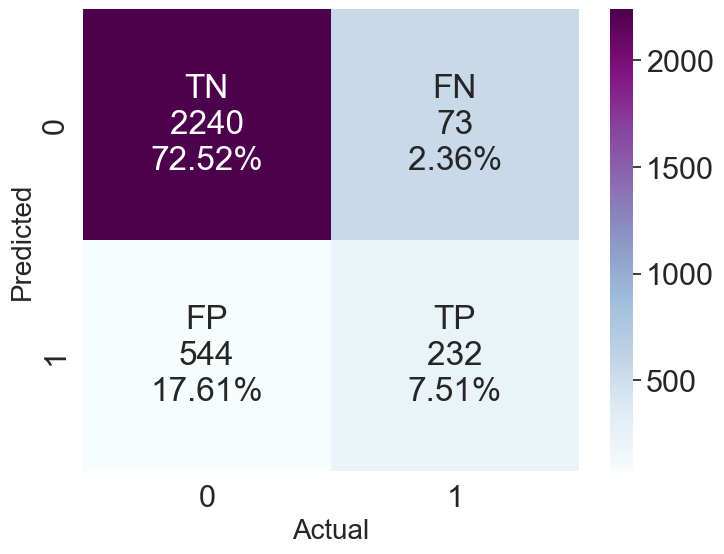

In [38]:
cf_matrix = metrics.confusion_matrix(dtest.get_label(), xgboost_tuned_weighted_predt)
TN = cf_matrix[0][0]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]
FP = cf_matrix[0][1]
fl = [TN, FN, FP, TP]
fig, ax = plt.subplots(figsize=(8,6))

sns.set(font_scale=2)
group_names = ['TN','FN','FP','TP']
group_counts = ["{0:0.0f}".format(value) for value in fl]
group_percentages = ["{0:.2%}".format(value) for value in
                     fl/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap="BuPu")
plt.ylabel('Predicted', fontsize=20)
plt.xlabel('Actual', fontsize=20)
ax.set_ylim([0,2])
ax.invert_yaxis()

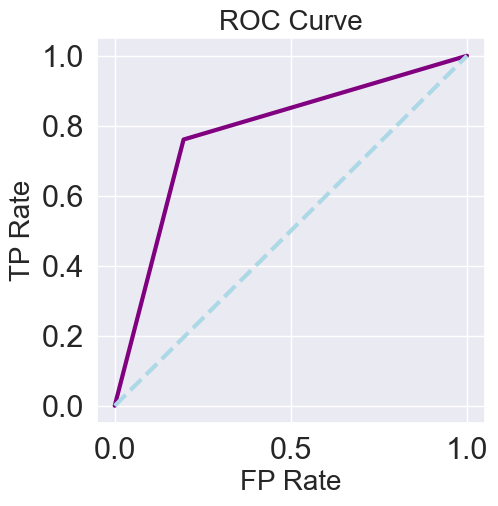

In [39]:
plt.rcParams['font.size'] = 16
plt.subplots(1, 1, figsize=(5,5))

rand_probs = [0 for _ in range(len(dtest.get_label()))]
rand_fpr, rand_tpr, thresholds = metrics.roc_curve(dtest.get_label(), rand_probs)

fpr, tpr, thresholds = metrics.roc_curve(dtest.get_label(), xgboost_tuned_weighted_predt,
                                         pos_label=1)
plt.plot(fpr, tpr, linewidth=3, color='purple')
plt.plot(rand_fpr, rand_tpr, linestyle='--', linewidth=3, color='lightblue')
plt.title("ROC Curve", fontsize=20)
plt.xlabel("FP Rate", fontsize=20)
plt.ylabel("TP Rate", fontsize=20)
plt.show()

In [40]:
# feat_imp = pd.DataFrame.from_dict(xgboost_tuned_weighted.get_score(importance_type='gain'), orient='index')
# feat_imp = feat_imp.reset_index()
# feat_imp = feat_imp.rename(columns={"index": "feature", 0: "score"})
# feat_imp = feat_imp.sort_values(by=['score'], ascending=False)

# feat_imp['name'] = None
# for i, feat in enumerate(feature_names):
#     #print(i, feat)
#     f = 'f'+str(i)
#     feat_imp['name'] = feat_imp.apply(lambda row: feat if row['feature']==f else row['name'], axis=1)
    
# feat_imp

In [41]:
feat_imp = pd.DataFrame.from_dict(xgboost_tuned_weighted.get_score(importance_type='gain'), orient='index')
feat_imp = feat_imp.reset_index()
feat_imp = feat_imp.rename(columns={"index": "feature", 0: "score"})
feat_imp = feat_imp.sort_values(by=['score'], ascending=False)
    
feat_imp

,feature,score
2,negative_conc,1289.977783
43,pos_PROPN,421.777802
7,bias_lexicon,119.473946
34,work,116.287125
33,time,112.924179
...,...,...
82,cogproc _context,10.825084
83,insight _context,8.725674
59,dep_pcomp,5.623596
79,negemo _context,1.342224


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11228\1199338459.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


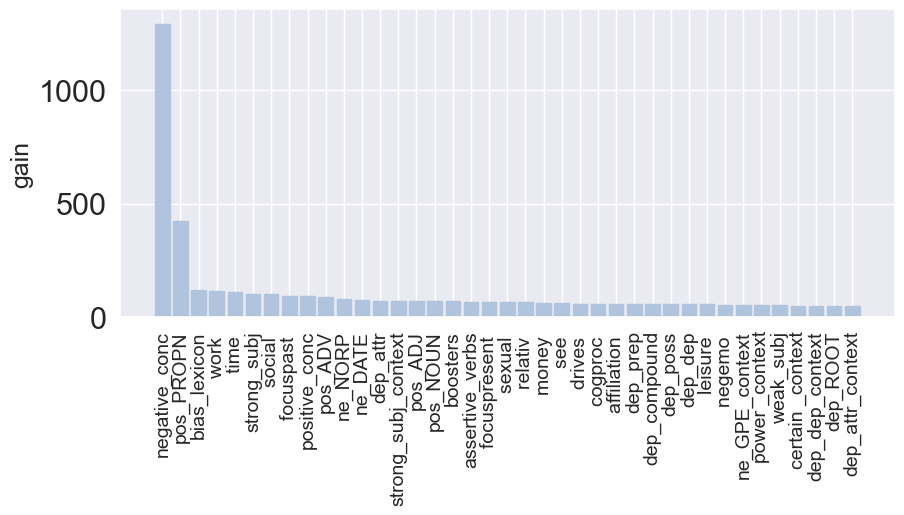

In [42]:
feat_imp_ = feat_imp[feat_imp['score']>=50]

fig, ax = plt.subplots(1, 1, figsize=(10,4))

xticklabels = feat_imp_.feature

ax.bar(np.arange(len(feat_imp_.feature)), feat_imp_.score,
        align='center', color='lightsteelblue', edgecolor='lightsteelblue')
ax.set_xticks(np.arange(len(feat_imp_.feature)))
ax.set_xticklabels(xticklabels, rotation=90, fontsize=14)
#ax.set_title('Features importance', fontsize=20)
ax.set_ylabel('gain', fontsize=18)

fig.show()

In [43]:
# features that have 0-importance
zer_imp = list(set(feature_names) - set(feat_imp.feature))
zer_imp

['dep_nsubjpass_context',
 'achieve _context',
 'dep_case',
 'posemo ',
 'kill_verbs',
 'pos_INTJ',
 'ne_LOC',
 'dep_appos',
 'ne_QUANTITY',
 'feel _context',
 'male ',
 'ne_PRODUCT',
 'family _context',
 'implicative_verbs',
 'dep_case_context',
 'dep_meta_context',
 'focuspast _context',
 'pos_INTJ_context',
 'ne_EVENT',
 'informal _context',
 'body ',
 'bio _context',
 'dep_punct_context',
 'factive_verbs',
 'dep_nsubjpass',
 'female _context',
 'dep_auxpass',
 'dep_dative_context',
 'netspeak ',
 'dep_preconj',
 'hear ',
 'dep_relcl_context',
 'ne_FAC_context',
 'dep_quantmod',
 'dep_neg',
 'ne_FAC',
 'dep_parataxis',
 'home _context',
 'dep_csubj',
 'ne_WORK_OF_ART_context',
 'dep_conj',
 'dep_nummod_context',
 'dep_advcl_context',
 'dep_expl_context',
 'dep_acomp_context',
 'dep_agent',
 'dep_predet',
 'swear _context',
 'pos_ADP',
 'dep_mark',
 'dep_prt',
 'sad _context',
 'ne_ORDINAL',
 'ne_QUANTITY_context',
 'female ',
 'dep_nummod',
 'money _context',
 'ne_CARDINAL',
 'swear

In [44]:
list(feat_imp.feature)

['negative_conc',
 'pos_PROPN',
 'bias_lexicon',
 'work ',
 'time ',
 'strong_subj',
 'social ',
 'focuspast ',
 'positive_conc',
 'pos_ADV',
 'ne_NORP',
 'ne_DATE',
 'dep_attr',
 'strong_subj_context',
 'pos_ADJ',
 'pos_NOUN',
 'boosters',
 'assertive_verbs',
 'focuspresent ',
 'sexual ',
 'relativ ',
 'money ',
 'see ',
 'drives ',
 'cogproc ',
 'affiliation ',
 'dep_prep',
 'dep_compound',
 'dep_poss',
 'dep_dep',
 'leisure ',
 'negemo ',
 'ne_GPE_context',
 'power _context',
 'weak_subj',
 'certain _context',
 'dep_dep_context',
 'dep_ROOT',
 'dep_attr_context',
 'dep_aux_context',
 'power ',
 'dep_ccomp',
 'ne_LOC_context',
 'dep_amod',
 'male _context',
 'ne_ORG_context',
 'bias_lexicon_context',
 'pos_PRON_context',
 'dep_nsubj',
 'affiliation _context',
 'tentat ',
 'dep_acl_context',
 'dep_npadvmod',
 'health ',
 'health _context',
 'boosters_context',
 'dep_advmod',
 'bio ',
 'ne_NORP_context',
 'risk _context',
 'differ _context',
 'dep_nmod_context',
 'report_verbs',
 'deat

### 3.3 Individual errors analysis

In [45]:
xgboost_tuned_weighted_predt = np.where(xgboost_tuned_weighted.predict(dtest) > 0.5, 1, 0)
test_labels['pred'] = xgboost_tuned_weighted_predt

err_analysis = pd.merge(pd.concat([test_features, test_labels], axis=1),
         data[['sentence','text','lemma','biased_words4']],
         how='left', 
         left_index=True, right_index=True)

err_analysis['error_type'] = err_analysis.apply(lambda row: 'TP' if row.label4==1 and row.pred==1 else
                                                            'FN' if row.label4==1 and row.pred==0 else
                                                            'FP' if row.label4==0 and row.pred==1 else
                                                            'TN', axis=1)

TP = err_analysis[err_analysis['error_type']=='TP']
FN = err_analysis[err_analysis['error_type']=='FN']
FP = err_analysis[err_analysis['error_type']=='FP']

from random import sample   
for word in sample(list(TP.text),50):
    print(word)

abortion
foaming
destabilizing
intolerant
escaped
devour
chaotic
vindictive
damage
needless
unjustly
bigoted
debilitating
prohibitively
illegal
corrupt
disruptive
good
view
refused
disrupted
civil
objectionable
tremendous
encourages
screaming
anarchists
Outraged
madness
implausible
conspiracy
monster
pointless
staging
convulsed
systematically
deadly
dismay
mock
racist
irrational
racists
grudge
urging
sexist
injustice
real
shadows
weaker
divisive


In [46]:

# TP.to_excel('TP.xlsx')
# FN.to_excel('FN.xlsx')
# FP.to_excel('FP.xlsx')